In [ ]:
importimport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
data = pd.read_csv('spam.csv',encoding = 'latin1')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data = data.rename(columns = {'v1':'label','v2':'text'})
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data['label_num'] = data['label'].map({'ham':0,'spam':1})
data

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


<Axes: xlabel='label', ylabel='count'>

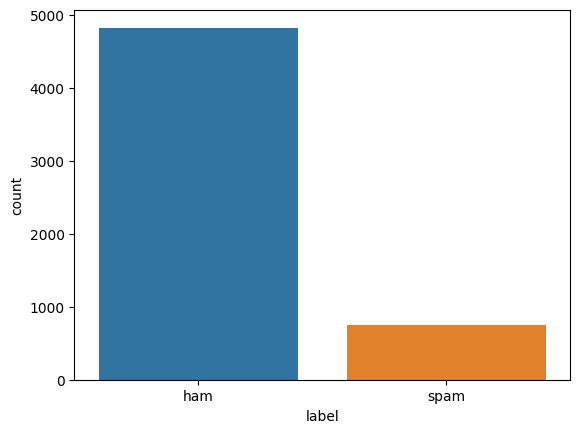

In [ ]:
sns.countplot(x=data['label'])

In [ ]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
data.shape

(5572, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   text       5572 non-null   object
 2   label_num  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [ ]:
data.describe()

,label_num
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
data.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [ ]:
data['length']=data['text'].apply(len)
data

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [ ]:
x = data.text
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [ ]:
y = data.label
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [ ]:
y.replace(to_replace = 'ham',value = 0 , inplace = True)
y.replace(to_replace = 'spam',value = 1 , inplace = True)
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [ ]:
y.value_counts()

0    4825
1     747
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

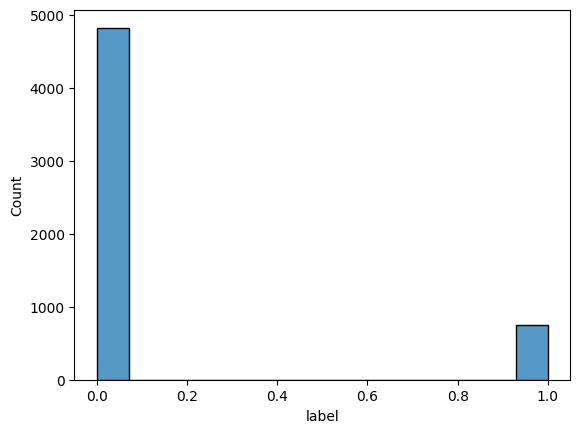

In [ ]:
sns.histplot(y)

In [ ]:
count = CountVectorizer()
text = count.fit_transform(data['text'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(text,data['label'],test_size = 0.3,random_state = 42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)
y_pred # 0 for nonspam and 1 for spam

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print("DecisionTreeClassifier")
print("Accuracy score :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred))
print("Recall score : ",recall_score(y_test,y_pred))
print("F1 score : ",f1_score(y_test,y_pred))

DecisionTreeClassifier
Accuracy score : 0.9671052631578947
Precision score : 0.8904761904761904
Recall score :  0.8538812785388128
F1 score :  0.8717948717948718


In [ ]:
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1453
           1       0.89      0.85      0.87       219

    accuracy                           0.97      1672
   macro avg       0.93      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

Confusion Matrix :
 [[1430   23]
 [  32  187]]
